## Loading the Training Dataset :
   - Importing Libraries to be used.
   - Loading the dataset.
   - Appending the Target Variable to the training_set as "Total_booking"
   - Checking the shape and describing the training set.

In [16]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Loading the Training Variables
train_set = pd.read_csv("train_cs1.csv")

# Loading the Training Labels
train_label = pd.read_csv("train_label_cs1.csv",names=["Total_booking"])
print("Length of the Training Labels is",len(train_label.iloc[:,0]))

Length of the Training Labels is 8708


In [18]:
# Concating the Labels column to the training_set
training_set = pd.concat([train_set,train_label],axis=1)
training_set

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking
0,5/2/2012 19:00,Summer,0,1,Clear + Few clouds,22.14,25.760,77,16.9979,504
1,9/5/2012 4:00,Fall,0,1,Clear + Few clouds,28.70,33.335,79,19.0012,5
2,1/13/2011 9:00,Spring,0,1,Clear + Few clouds,5.74,6.060,50,22.0028,139
3,11/18/2011 16:00,Winter,0,1,Clear + Few clouds,13.94,16.665,29,8.9981,209
4,9/13/2011 13:00,Fall,0,1,Clear + Few clouds,30.34,33.335,51,19.0012,184
5,8/17/2012 17:00,Fall,0,1,Clear + Few clouds,33.62,12.120,36,22.0028,791
6,10/6/2012 9:00,Winter,0,0,Clear + Few clouds,24.60,29.545,73,12.9980,395
7,9/10/2012 4:00,Fall,0,1,Clear + Few clouds,21.32,25.000,68,19.0012,5
8,7/14/2012 4:00,Fall,0,0,"Light Snow, Light Rain",27.06,31.060,61,7.0015,9
9,2/6/2011 18:00,Spring,0,0,Clear + Few clouds,12.30,15.150,56,11.0014,78


## Deriving New Columns:
  - Year
  - Month Name
  - Week Day
  - Day of month

In [19]:
# Adding Date Column to the dataset
training_set["date"]=training_set.datetime.str.split().str[0].str.strip()

# Coverting the date Column to datetime64 format
training_set["date"]=pd.to_datetime(training_set["date"])

In [20]:
# Adding Hour Of day column to the dataset By extracting only the corresponding hours from the Datetime Column
training_set["hour_of_day"]=training_set.datetime.str.split().str[1].str.strip().str.split(":").str[0].astype(int)

# Dropping the original datetime column
DateTime = training_set.datetime
training_set=training_set.drop("datetime",axis=1)

In [21]:
# Deriving Day Month And Year Columns and adding it to the dataset
training_set["year"]=training_set["date"].dt.year
training_set["weekday"]=training_set["date"].dt.weekday_name
training_set["month"]=training_set["date"].dt.month_name()
training_set["day"]=training_set["date"].dt.day

# Dropping the date column
training_set=training_set.drop("date",axis=1)

## Missing Value Treatment :
  - Checking the percentage of null values.
  - As we can see there are no null values in the training dataset.

In [22]:
# Checking the Percentage of null values.
training_set.isnull().sum()/len(training_set)*100

season           0.0
holiday          0.0
workingday       0.0
weather          0.0
temp             0.0
atemp            0.0
humidity         0.0
windspeed        0.0
Total_booking    0.0
hour_of_day      0.0
year             0.0
weekday          0.0
month            0.0
day              0.0
dtype: float64

## Encoding the Categorical Variables :
  - season (spring, summer, autumn & winter)
  - weather (Clear, Cloudy, Light Rain & Heavy)
  - month (January to December)
  - weekday (Monday to Sunday)

In [54]:
training_set.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,Total_booking,hour_of_day,year,weekday,month,day
0,215.086482,0,1,206.01547,22.14,25.760,77,16.9979,504,19,2012,193.173203,222.236589,2
1,237.344906,0,1,206.01547,28.70,33.335,79,19.0012,5,4,2012,193.173203,238.500690,5
2,117.019663,0,1,206.01547,5.74,6.060,50,22.0028,139,9,2011,195.135852,91.033189,13
3,200.666972,0,1,206.01547,13.94,16.665,29,8.9981,209,16,2011,198.958435,190.572973,18
4,237.344906,0,1,206.01547,30.34,33.335,51,19.0012,184,13,2011,193.008130,238.500690,13


In [24]:
#Converting the weekday categories to numerical by substituting with its mean bookings each per category respectively
weekday_mean = training_set.pivot_table(index="weekday",values="Total_booking")
weekday_mean_ser = pd.Series(weekday_mean["Total_booking"],index=weekday_mean.index)
training_set.weekday = training_set.weekday.map(weekday_mean_ser)

In [26]:
# Unique Categories in weather column
training_set.weather.unique()

array([' Clear + Few clouds', ' Light Snow, Light Rain',
       ' Mist + Cloudy ', ' Heavy Rain + Thunderstorm '], dtype=object)

In [29]:
# Weather by the mean target
weather_mean = training_set.pivot_table(index="weather",values="Total_booking")
weather_mean_ser = pd.Series(weather_mean["Total_booking"],index=weather_mean.index)
training_set.weather = training_set.weather.map(weather_mean_ser)
weather_mean

,Total_booking
weather,
Clear + Few clouds,206.015470
Heavy Rain + Thunderstorm,164.000000
"Light Snow, Light Rain",118.256637
Mist + Cloudy,182.405975


In [291]:
weather_mean.sort_values(by="Total_booking",ascending=False)

,Total_booking
weather,
Clear + Few clouds,206.015470
Mist + Cloudy,182.405975
Heavy Rain + Thunderstorm,164.000000
"Light Snow, Light Rain",118.256637


In [13]:
# Unique Categories in season column
training_set.season.unique()

array(['Summer', 'Fall', 'Spring', 'Winter'], dtype=object)

In [31]:
# Season by the mean target
season_mean = training_set.pivot_table(index="season",values="Total_booking")
season_mean_ser = pd.Series(season_mean["Total_booking"],index=season_mean.index)
training_set.season = training_set.season.map(season_mean_ser)
season_mean

,Total_booking
season,
Fall,237.344906
Spring,117.019663
Summer,215.086482
Winter,200.666972


In [290]:
season_mean.sort_values(by="Total_booking",ascending=False)

,Total_booking
season,
Fall,237.344906
Summer,215.086482
Winter,200.666972
Spring,117.019663


In [15]:
# Month Categories in month column
training_set.month.unique()

array(['May', 'September', 'January', 'November', 'August', 'October',
       'July', 'February', 'March', 'June', 'December', 'April'],
      dtype=object)

In [53]:
# MOnth by mean of target
month_mean = training_set.pivot_table(index="month",values="Total_booking")
month_mean_ser = pd.Series(month_mean["Total_booking"],index=month_mean.index)
training_set.month = training_set.month.map(month_mean_ser)
month_mean

,Total_booking
month,
April,180.146739
August,235.801642
December,179.090041
February,107.832642
January,91.033189
July,237.740791
June,243.039510
March,151.256944
May,222.236589


In [66]:
# Holiday by mean of target
holiday_mean = training_set.pivot_table(index="holiday",values="Total_booking")
holiday_mean_ser = pd.Series(holiday_mean["Total_booking"],index=holiday_mean.index)
training_set.holiday = training_set.holiday.map(holiday_mean_ser)
holiday_mean

,Total_booking
holiday,
0,193.143499
1,188.350806


In [69]:
training_set.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour_of_day,weekday,month,day,Total_booking
0,215.086482,193.143499,1,206.01547,22.14,25.760,77,16.9979,19,193.173203,222.236589,2,504
1,237.344906,193.143499,1,206.01547,28.70,33.335,79,19.0012,4,193.173203,238.500690,5,5
2,117.019663,193.143499,1,206.01547,5.74,6.060,50,22.0028,9,195.135852,91.033189,13,139
3,200.666972,193.143499,1,206.01547,13.94,16.665,29,8.9981,16,198.958435,190.572973,18,209
4,237.344906,193.143499,1,206.01547,30.34,33.335,51,19.0012,13,193.008130,238.500690,13,184


In [235]:
# Importing label encoder and instantiating it to variable "le" 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [236]:
# label Encoding the value_counts of each category in weather
training_set.weather = le.fit_transform(training_set.weather)
training_set.weather.unique()

# label Encoding the value_counts of each category in season
training_set.season = le.fit_transform(training_set.season)
training_set.season.unique()

# label Encoding the value_counts of each category in month
training_set.month = le.fit_transform(training_set.month)
training_set.month.unique()

# label Encoding the value_counts of each category in weekday
training_set.weekday = le.fit_transform(training_set.weekday)
training_set.weekday.unique()

array([3, 4, 5, 2, 6, 1, 0], dtype=int64)

In [237]:
# Adding target variable to the end
training_set["Total_Booking"] =training_set["Total_booking"]
training_set = training_set.drop("Total_booking",axis=1)
training_set = training_set.rename({"Total_Booking":"Total_booking"},axis=1)

## Outlier Detection & Treatment :
   - It is observed that the windspeed column has alot of outliers.
   - All the Outlies are concentrated above the Upper Limit.
   - Thus we will use capping method to remove the outliers.
   - We will cap all the outlier values with the Upper Limit value.

([<matplotlib.axis.XTick at 0x2b2cd2853c8>,
 <a list of 2 Text xticklabel objects>)

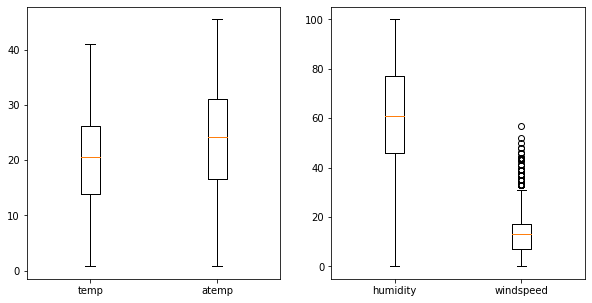

In [55]:
# Outlier checking in the temp and atemp
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot([training_set["temp"],training_set["atemp"]])
plt.xticks([1,2],["temp","atemp"])

plt.subplot(1,2,2)
plt.boxplot([training_set["humidity"],training_set["windspeed"]])
plt.xticks([1,2],["humidity","windspeed"])

In [56]:
# Treatment of outlier in windspeed column
IQR =training_set.windspeed.quantile(0.75) - training_set.windspeed.quantile(0.25) 

UL = training_set.windspeed.quantile(0.75)+1.5*IQR
LL = training_set.windspeed.quantile(0.25)-1.5*IQR


# Percentage of outlier in the windspeed column
outliers = pd.DataFrame(np.where((training_set["windspeed"]>UL),"outlier","not outlier"),columns=["OUTLIER"])
no_of_outlier=outliers.groupby("OUTLIER")["OUTLIER"].count()["outlier"]

print("Percentage of outliers present in the windspeed column is {:.2f}".format(no_of_outlier/len(outliers)*100))

Percentage of outliers present in the windspeed column is 2.09


In [57]:
# Total no of outliers in the windspeed column
no_of_outlier

182

In [58]:
# Capping the Outlier values
training_set.windspeed = np.where((training_set["windspeed"]>UL),UL,training_set["windspeed"])

([<matplotlib.axis.XTick at 0x2b2cd2c2d30>],
 <a list of 1 Text xticklabel objects>)

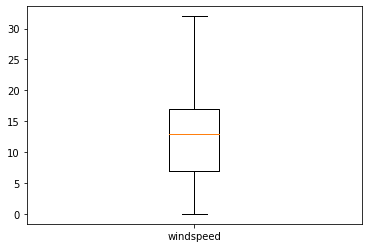

In [59]:
# Thus we can see the outliers are removed from the windspeed column 
plt.boxplot([training_set["windspeed"]])
plt.xticks([1],["windspeed"])

In [63]:
# Dropping the Year column and saving it in the variable YEAR
YEAR = training_set["year"]
training_set =training_set.drop("year",axis=1)

# Exploratory Data Analysis:
  - Correlation
  - average no. of bookings during Weekdays and weekends
  - Most no. of bookings at which range of Humidity level
  - Change in behaviour of booking corresponding to various Seasons
  - Peak Booking Hour Of the day
  - Effect of weather on the Bookings
  - Average no. of bookings at which Temperature range
  - Forecasting the no. of bookings for next 4 month from Jan 2013
  - Does atemp have any significant affect on the bookings
  - What are the favorable Time of month where there is high expectation of bookings.

## Model Building :
 - To predict the Total_booking using Suitable Features

In [267]:
IV = training_set[["temp","atemp","hour_of_day","humidity","workingday","season","weather","month"]]#.apply(lambda x: np.log(x+1))
DV = training_set['Total_booking']
IV.head()

,temp,atemp,hour_of_day,humidity,workingday,season,weather,month
0,22.14,25.760,19,77,1,2,3,6
1,28.70,33.335,4,79,1,3,3,10
2,5.74,6.060,9,50,1,0,3,0
3,13.94,16.665,16,29,1,1,3,5
4,30.34,33.335,13,51,1,3,3,10


In [268]:
from sklearn.linear_model import LinearRegression,LassoCV,Ridge,Lasso,RidgeCV
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,VotingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
import math
trainx,testx,trainy,testy = train_test_split(IV,DV,test_size=0.2)

#### Correlation Using Heatmap :

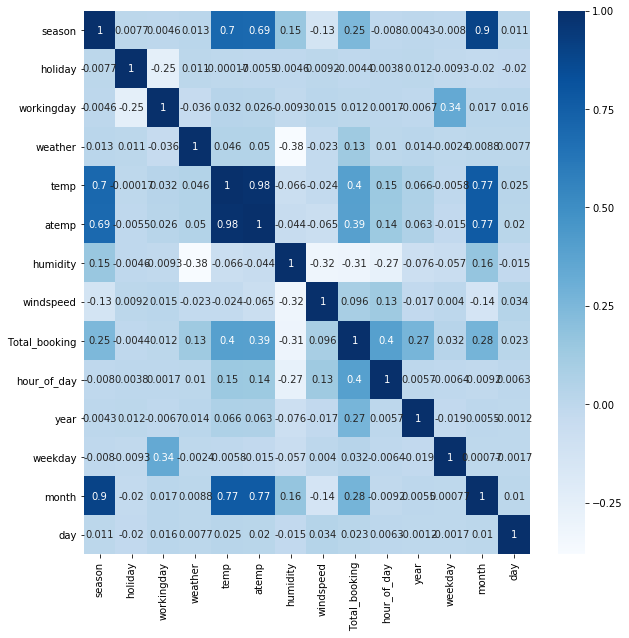

In [60]:
# Checking the correlation using heatmap
plt.figure(figsize=(10,10))
sns.heatmap(training_set.corr(),annot=True,cmap="Blues")

- Here we can see temp,atemp & hour_of_day are High positively correlated to the Total_bookings
- Whereas features like season, weather, workingday & month are weak positively correlated to the target variable.
- While humidity is negetively correlated to the Total_Bookings
- So these are the features which shows significant relation with the target variable.

In [269]:
# Fitting the model using Simple linear regressor
lr = LinearRegression()
lr.fit(trainx,trainy)
# intercept and coef values  
print("Intercept: ",lr.intercept_)
print("Coef values: ",lr.coef_,sep="\n")
prediction = np.round(lr.predict(testx),0).astype(int)
r2_score(testy,prediction)


Intercept:  33.539572394300535
Coef values: 
[  3.6210837    4.22833118   7.54754998  -1.92767012   0.76229219
 -17.6368326    5.50998257   5.36808953]


0.3146595835209677

In [293]:
# Fitting the model

# Base models
g = GradientBoostingRegressor(n_estimators=500)
xg = XGBRegressor(n_estimators=500)
r = RandomForestRegressor(n_estimators=400)


# ensembling all the base models
vo = VotingRegressor(estimators = [("rf",r),("xg",xg),("g",g)])
vo.fit(trainx,trainy)
predvo = vo.predict(testx)
r2_score(testy,predvo)

D:\anaconda_navi\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[00:19:02] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


0.8586774875645335

In [294]:
# Calculating the test RMSE
math.sqrt(mean_squared_error(testy,predvo))

68.23392780457885

### Loading Test Data

In [76]:
# Loading the test data and test label
test_set = pd.read_csv("test_cs1.csv")
test_labels = pd.read_csv("test_label_cs1.csv",names=["Total_booking"])

In [77]:
# Concatinating the labels to the test_set
test_set = pd.concat([test_set,test_labels],axis=1)

In [78]:
# Checking for null values
test_set.isnull().sum()/len(test_set)*100

datetime         0.0
season           0.0
holiday          0.0
workingday       0.0
weather          0.0
temp             0.0
atemp            0.0
humidity         0.0
windspeed        0.0
Total_booking    0.0
dtype: float64

In [278]:
# Adding Date Column to the dataset
test_set["date"]=test_set.datetime.str.split().str[0].str.strip()

# Coverting the date Column to datetime64 format
test_set["date"]=pd.to_datetime(test_set["date"])


# Adding Hour Of day column to the dataset By extracting only the corresponding hours from the Datetime Column
test_set["hour_of_day"]=test_set.datetime.str.split().str[1].str.strip().str.split(":").str[0].astype(int)

# Dropping the original datetime column
test_set=test_set.drop("datetime",axis=1)


# Deriving Day Month And Year Columns and adding it to the dataset
test_set["year"]=test_set["date"].dt.year
test_set["weekday"]=test_set["date"].dt.weekday_name
test_set["month"]=test_set["date"].dt.month_name()
test_set["day"]=test_set["date"].dt.day

# Dropping the date column
test_set=test_set.drop("date",axis=1)

# Converting each of the category of weather column to numerical by substituting by its frequency.
weather_meant = test_set.pivot_table(index="weather",values="Total_booking")
weather_mean_sert = pd.Series(weather_meant["Total_booking"],index=weather_meant.index)
test_set.weather = test_set.weather.map(weather_mean_sert)

# Converting each of the category of season column to numerical by substituting by its frequency.
season_meant = test_set.pivot_table(index="season",values="Total_booking")
season_mean_sert = pd.Series(season_meant["Total_booking"],index=season_meant.index)
test_set.season = test_set.season.map(season_mean_sert)

# Converting each of the category of month column to numerical by substituting by its frequency.
month_meant = test_set.pivot_table(index="month",values="Total_booking")
month_mean_sert = pd.Series(month_meant["Total_booking"],index=month_meant.index)
test_set.month = test_set.month.map(month_mean_sert)

# Converting each of the category of weekday column to numerical by substituting by its frequency.
weekday_meant = test_set.pivot_table(index="weekday",values="Total_booking")
weekday_mean_sert = pd.Series(weekday_meant["Total_booking"],index=weekday_meant.index)
test_set.weekday = test_set.weekday.map(weekday_mean_sert)

# Importing label encoder and instantiating it to variable "le" 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# label Encoding the value_counts of each category in weather
test_set.weather = le.fit_transform(test_set.weather)
test_set.weather.unique()

# label Encoding the value_counts of each category in season
test_set.season = le.fit_transform(test_set.season)
test_set.season.unique()

# label Encoding the value_counts of each category in month
test_set.month = le.fit_transform(test_set.month)
test_set.month.unique()

# label Encoding the value_counts of each category in weekday
test_set.weekday = le.fit_transform(test_set.weekday)
test_set.weekday.unique()

# Adding target variable to the end
test_set["Total_Booking"] =test_set["Total_booking"]
test_set = test_set.drop("Total_booking",axis=1)
test_set = test_set.rename({"Total_Booking":"Total_booking"},axis=1)

# Dropping the Year column and saving it in the variable YEAR
YEARt = test_set["year"]
test_set =test_set.drop("year",axis=1)

([<matplotlib.axis.XTick at 0x2b2f0313a90>,
 <a list of 2 Text xticklabel objects>)

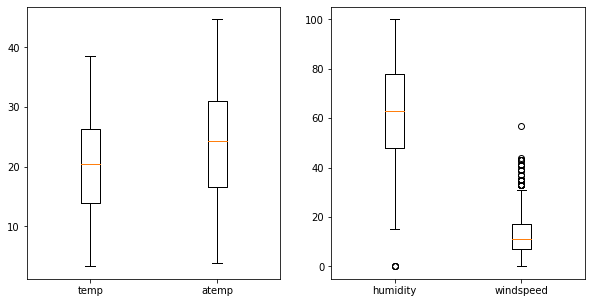

In [279]:
# Treatment of outlier in windspeed column
IQRt1 =test_set.windspeed.quantile(0.75) - test_set.windspeed.quantile(0.25) 

ULt1 = test_set.windspeed.quantile(0.75)+1.5*IQRt1
LLt1 = test_set.windspeed.quantile(0.25)-1.5*IQRt1


# Treatment of outlier in humidity column
IQRt2 =test_set.humidity.quantile(0.75) - test_set.humidity.quantile(0.25) 

ULt2 = test_set.humidity.quantile(0.75)+1.5*IQRt2
LLt2 = test_set.humidity.quantile(0.25)-1.5*IQRt2


# Outlier checking in the temp,atemp,windspeed & humidity
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.boxplot([test_set["temp"],test_set["atemp"]])
plt.xticks([1,2],["temp","atemp"])

plt.subplot(1,2,2)
plt.boxplot([test_set["humidity"],test_set["windspeed"]])
plt.xticks([1,2],["humidity","windspeed"])



In [280]:
# Capping the Outlier values in windspeed
test_set.windspeed = np.where((test_set["windspeed"]>ULt1),ULt1,test_set["windspeed"])

# Capping the Outlier values in humidity
test_set.humidity = np.where((test_set["humidity"]<LLt2),LLt2,test_set["humidity"])

([<matplotlib.axis.XTick at 0x2b2f0695cf8>,
 <a list of 2 Text xticklabel objects>)

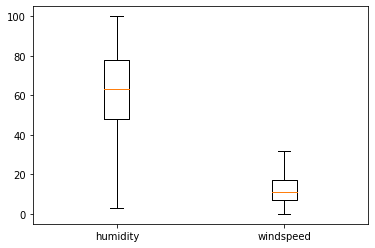

In [281]:
# After Outlier Treatment
plt.boxplot([test_set["humidity"],test_set["windspeed"]])
plt.xticks([1,2],["humidity","windspeed"])

In [282]:
# IVTest

IVt = test_set[["temp","atemp","hour_of_day","humidity","workingday","season","weather","month"]]#.apply(lambda x: np.log(x+1))
DVt = test_set['Total_booking']

In [288]:
# Creating the Final ensemble model using the whole training_set for training the model
vom = VotingRegressor(estimators = [("rf",r),("xg",xg),("g",g)])
vom.fit(IV,DV)

# Using the test_Set for predicting the total booking
predvo = vom.predict(IVt)

D:\anaconda_navi\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
D:\anaconda_navi\lib\site-packages\xgboost\core.py:588: FutureWarning: Series.base is deprecated and will be removed in a future version
  data.base is not None and isinstance(data, np.ndarray) \


[13:58:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [289]:
# Evaluating the Model using R2Score and RMSE

print("R2 Score is ",r2_score(DVt,predvo))

print("Root Mean Squared Error is ",math.sqrt(mean_squared_error(DVt,predvo)))

R2 Score is  0.8392267043045138
Root Mean Squared Error is  71.92950959111276
